In [1]:
#! /usr/local/opt/python/bin/python3.7 -m pip install -U matplotlib
#! /usr/local/opt/python/bin/python3.7 -m pip install seaborn

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn 
import numpy as np

In [3]:
f = open("CheckM_results_file", "r")
file = f.read()

In [4]:
type(file)

str

In [5]:
fileList = file.split("\n")

In [6]:
fileList[1]

'S10C10200\troot (UID1)\t5656\t56\t24\t56\t0\t0\t0\t0\t0\t0.00\t0.00\t0.00'

In [7]:
df = pd.DataFrame(fileList)

In [8]:
df = df.replace(' ', '_', regex=True)

In [9]:
df.head(2)
# Bin Id	Marker lineage	# genomes	# markers	# marker sets	0	1	2	3	4	5+	Completeness	Contamination	S'

,0
0,Bin_Id\tMarker_lineage\t#_genomes\t#_markers\t...
1,S10C10200\troot_(UID1)\t5656\t56\t24\t56\t0\t0...


In [10]:
df.columns = ['bins']

In [11]:
df[['Bin_Id','Marker_lineage', '#_genomes', '#_markers', '#_marker_sets', '0', '1', '2', '3', '4', '5+'\
   , 'Completeness', 'Contamination', 'Strain heterogeneity']] = df.bins.str.split("\t",expand=True)

In [12]:
df

,bins,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
0,Bin_Id\tMarker_lineage\t#_genomes\t#_markers\t...,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain_heterogeneity
1,S10C10200\troot_(UID1)\t5656\t56\t24\t56\t0\t0...,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
2,S10C1032\to__Bacteroidales_(UID2654)\t163\t486...,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.00
3,S10C1039\to__Lactobacillales_(UID355)\t490\t33...,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.00
4,S10C1094\tk__Bacteria_(UID203)\t5449\t104\t58\...,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,S9C8881\to__Bacteroidales_(UID2657)\t160\t492\...,S9C8881,o__Bacteroidales_(UID2657),160,492,269,58,431,3,0,0,0,88.01,0.63,0.00
2963,S9C92\to__Actinomycetales_(UID1572)\t580\t286\...,S9C92,o__Actinomycetales_(UID1572),580,286,172,11,275,0,0,0,0,96.12,0.00,0.00
2964,S9C962\to__Campylobacterales_(UID3068)\t106\t4...,S9C962,o__Campylobacterales_(UID3068),106,477,284,13,463,1,0,0,0,96.30,0.18,100.00
2965,S9C99\to__Selenomonadales_(UID1024)\t64\t334\t...,S9C99,o__Selenomonadales_(UID1024),64,334,167,103,227,4,0,0,0,78.94,2.10,50.00


In [13]:
# drop first row because we get double headers 
df = df.drop(0)

last_row = len(df)
df = df.drop(df.index[last_row-1]) 

In [14]:
df

,bins,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
1,S10C10200\troot_(UID1)\t5656\t56\t24\t56\t0\t0...,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
2,S10C1032\to__Bacteroidales_(UID2654)\t163\t486...,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.00
3,S10C1039\to__Lactobacillales_(UID355)\t490\t33...,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.00
4,S10C1094\tk__Bacteria_(UID203)\t5449\t104\t58\...,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.00
5,S10C10947\troot_(UID1)\t5656\t56\t24\t56\t0\t0...,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,S9C86\tc__Bacilli_(UID285)\t586\t325\t181\t45\...,S9C86,c__Bacilli_(UID285),586,325,181,45,272,8,0,0,0,85.55,2.23,25.00
2962,S9C8881\to__Bacteroidales_(UID2657)\t160\t492\...,S9C8881,o__Bacteroidales_(UID2657),160,492,269,58,431,3,0,0,0,88.01,0.63,0.00
2963,S9C92\to__Actinomycetales_(UID1572)\t580\t286\...,S9C92,o__Actinomycetales_(UID1572),580,286,172,11,275,0,0,0,0,96.12,0.00,0.00
2964,S9C962\to__Campylobacterales_(UID3068)\t106\t4...,S9C962,o__Campylobacterales_(UID3068),106,477,284,13,463,1,0,0,0,96.30,0.18,100.00


In [15]:
# drop first coulmn that is the original combined string
df = df.iloc[: , 1:]

In [16]:
df.Completeness = df.Completeness.astype(float)
df.Contamination = df.Contamination.astype(float)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
print(max(df.Completeness))
print(max(df.Contamination))

100.0
265.69


In [18]:
query = 100
df.query('Contamination > %d' %query)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
143,S12C3084,k__Bacteria_(UID203),5449,104,58,1,19,13,70,1,0,98.28,181.22,27.51
1493,S36C456,k__Bacteria_(UID203),5449,102,57,3,21,23,27,20,8,97.93,206.56,17.11
2479,S53C1778,k__Bacteria_(UID203),5449,104,58,2,30,21,16,17,18,98.28,265.69,26.72
2804,S8C1094,k__Bacteria_(UID203),5449,104,58,1,6,40,56,1,0,99.66,176.99,28.50


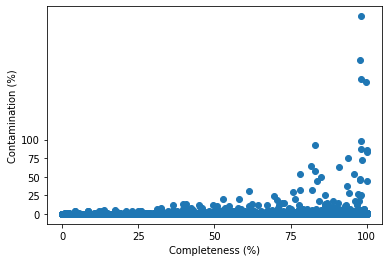

In [19]:

plt.scatter(df.Completeness, df.Contamination)

plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')



plt.xticks(np.arange(0, 101, 25))
plt.yticks(np.arange(0, 101, 25))

plt.show() 

In [20]:
#removing the bins with contamination above 100%

def drop_at_index(df, indexList):
    indexList.sort(reverse=True)
    for i in indexList:
        df = df.drop(i) 
#         print(df.query('Contamination > %d' %100))
    return df   

In [22]:
indexList = [143, 1493, 2479, 2804]
df_cont_below_100 = drop_at_index(df, indexList)

In [23]:
#adding an extra column to define the colors in the scatterplot
# 0 = highQ, 1 = middelHigh, 2 = middleLow, 3 = low 
def conditions(s):
    
    QS = s['Completeness'] - (5 * s['Contamination'])
    
    if (s['Contamination'] < 5) and (s['Completeness'] > 90):
        return 0
    elif (s['Contamination'] < 10) and (s['Completeness'] > 50) and QS > 50:
        return 1
    elif (s['Contamination'] < 10) and (s['Completeness'] > 50) and QS <= 50:
        return 2
    else:
        return 3

In [24]:
df_cont_below_100['bin_class'] = df_cont_below_100.apply(conditions, axis=1)

In [25]:
df_cont_below_100.head(10)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class
1,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00,3
2,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.00,3
3,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.00,0
4,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.00,3
5,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00,3
6,S10C1113,o__Lactobacillales_(UID355),490,332,181,1,331,0,0,0,0,99.45,0.00,0.00,0
7,S10C119,o__Lactobacillales_(UID375),177,350,163,86,261,3,0,0,0,71.36,1.07,100.00,1
8,S10C1295,o__Campylobacterales_(UID3068),106,477,284,224,249,4,0,0,0,52.55,0.66,25.00,2
9,S10C1297,o__Lactobacillales_(UID374),471,350,191,8,341,1,0,0,0,96.60,0.26,0.00,0
10,S10C13511,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.00,3


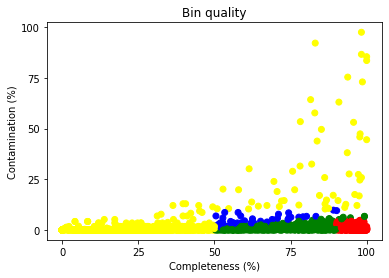

In [26]:
colormap = np.array(['r', 'g', 'b', 'yellow'])

plt.scatter(df_cont_below_100.Completeness, df_cont_below_100.Contamination, c=colormap[df_cont_below_100['bin_class']])


plt.title('Bin quality')
plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')
plt.xticks(np.arange(0, 101, 25))
plt.yticks(np.arange(0, 101, 25))

plt.show()